__Flight Price Prediction__

Problem Statement:
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

Size of training set: 10683 records

Size of test set: 2671 records

FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_set = pd.read_excel('Data_Train.xlsx')
test_set = pd.read_excel('Test_set.xlsx')

In [3]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
train_set.shape

(10683, 11)

In [6]:
test_set.shape

(2671, 10)

In [7]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [9]:
train_set.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
train_set.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [11]:
test_set.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [12]:
train_set.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [13]:
test_set.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [14]:
train_set.corr()

,Price
Price,1.0


there are very less null values

Size of training set: 10683 records

Size of test set: 2671 records

In [15]:
df = train_set.append(test_set)

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [17]:
df.shape

(13354, 11)

In [18]:
# Converting Date OF Journey into Day, Date and Month of Journey

df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month
df['weekday']= pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,6
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,4


In [20]:
df.drop(labels='Date_of_Journey', axis=1, inplace=True)

In [21]:
df.Duration

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
         ...   
2666    23h 55m
2667     2h 35m
2668     6h 35m
2669    15h 15m
2670    14h 20m
Name: Duration, Length: 13354, dtype: object

In [22]:
import re

df['Mintues'] = df.Duration.apply(lambda x: x[-3:-1])

df.Duration = df.Duration.apply(lambda x: int(re.findall('\d+',x[:2])[0])*60)

df.Duration = df.Mintues.astype('int') + df.Duration

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday,Mintues
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897.0,24,3,6,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662.0,1,5,2,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1159,2 stops,No info,13882.0,9,6,6,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218.0,12,5,6,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302.0,1,3,4,45


In [24]:
df.drop(labels='Mintues', axis=1, inplace=True)

In [25]:
def deparrtime(x):
    x=x.strip()
    tt=(int)(x.split(':')[0])
    if(tt>=16 and tt<21):
        x='Evening'
    elif(tt>=21 or tt<5):
        x='Night'
    elif(tt>=5 and tt<11):
        x='Morning'
    elif(tt>=11 and tt<16):
        x='Afternoon'
    return x
df['Dep_Time']=df['Dep_Time'].apply(deparrtime)
df['Arrival_Time']=df['Arrival_Time'].apply(deparrtime)

In [26]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,non-stop,No info,3897.0,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2 stops,No info,7662.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2 stops,No info,13882.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1 stop,No info,6218.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1 stop,No info,13302.0,1,3,4


In [27]:
def stops(x):
    if(x=='non-stop'):
        x=str(0)
    else:
        str(x).strip()
        stps=str(x).split(' ')[0]
        x=stps
    return x
df['Total_Stops']=df['Total_Stops'].apply(stops)



pd.options.mode.chained_assignment = None 
for i in range(df.shape[0]):
    if(df.iloc[i]['Additional_Info']=='No info'):
        df.iloc[i]['Additional_Info']='No Info' 

In [28]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897.0,24,3,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662.0,1,5,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2,No info,13882.0,9,6,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218.0,12,5,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302.0,1,3,4


In [29]:
df["Journey_Month"]=df["Journey_Month"].replace({3:"March",4:"April",5:"May",6:"June"}) 

In [30]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,BLR → DEL,Night,Night,170,0,No info,3897.0,24,March,6
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,Morning,Afternoon,445,2,No info,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,Morning,Night,1159,2,No info,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,Evening,Night,325,1,No info,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,Evening,Night,285,1,No info,13302.0,1,March,4


# Dropping Redundant Columns


In [31]:

df=df.drop(['Arrival_Time'], axis=1) 

df=df.drop(['Route'], axis=1) 


In [32]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,No info,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,No info,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,No info,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,No info,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,No info,13302.0,1,March,4


In [33]:
df.weekday.value_counts()

2    2621
0    2307
3    2283
5    2097
6    1849
4    1121
1    1076
Name: weekday, dtype: int64

In [34]:
df.corr()

,Duration,Price,Journey_Day,weekday
Duration,1.000000,0.506607,-0.022909,-0.008226
Price,0.506607,1.000000,-0.153738,0.051613
Journey_Day,-0.022909,-0.153738,1.000000,-0.082577
weekday,-0.008226,0.051613,-0.082577,1.000000


<AxesSubplot:>

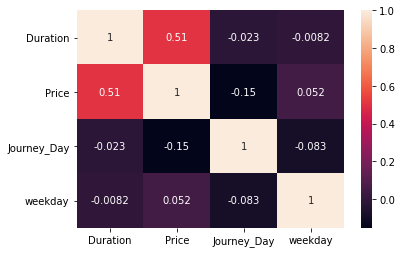

In [35]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Airline', ylabel='count'>

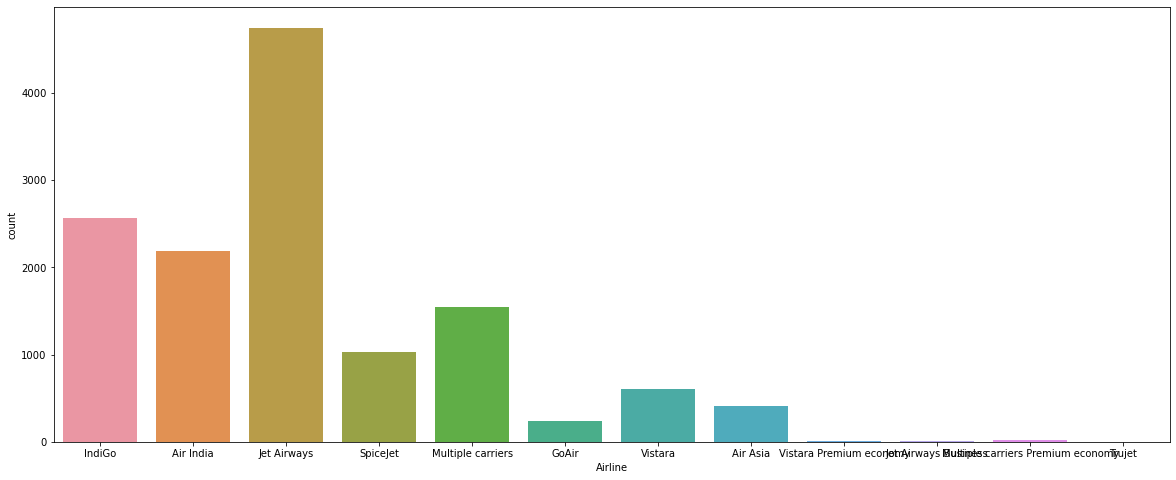

In [36]:
plt.figure(figsize=(20,8))
sns.countplot(df.Airline)

In [37]:
df.Airline.value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

__Jet Airways, Indigo & Air India Covers More than 70% of the Airlines__

In [38]:
df.Source.value_counts()

Delhi       5682
Kolkata     3581
Banglore    2752
Mumbai       883
Chennai      456
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='count'>

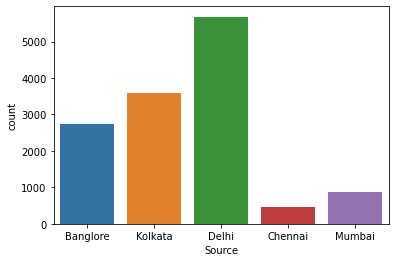

In [39]:
sns.countplot(df.Source)

<AxesSubplot:xlabel='Destination', ylabel='count'>

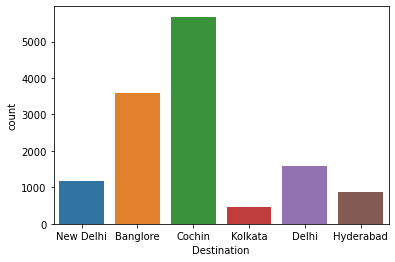

In [40]:
sns.countplot(df.Destination)

<AxesSubplot:xlabel='Dep_Time', ylabel='count'>

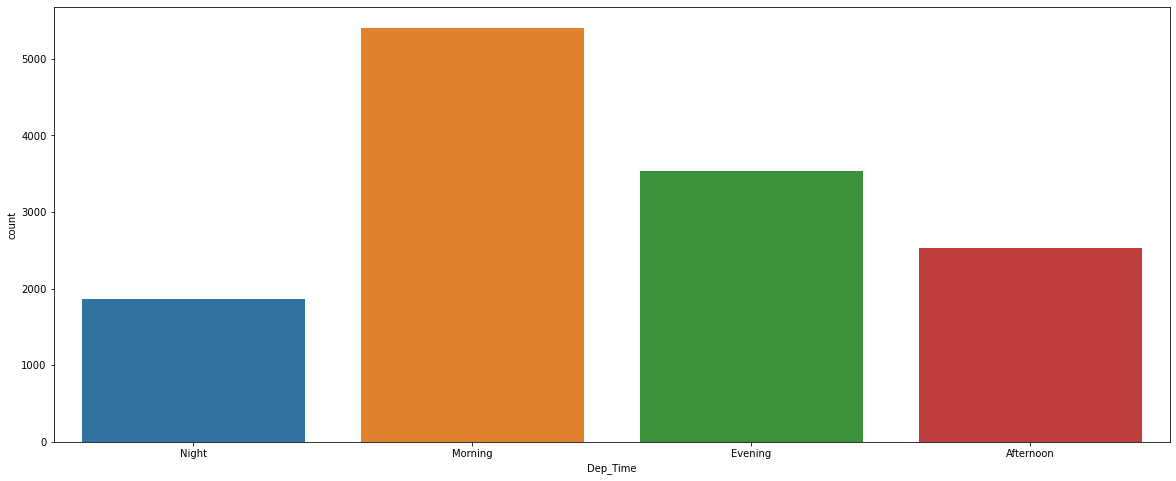

In [41]:
plt.figure(figsize=(20,8))
sns.countplot(df.Dep_Time)

In [42]:
df.Duration.value_counts()

170     672
90      493
165     432
175     418
155     399
       ... 
2867      1
2120      1
1945      1
225       1
1975      1
Name: Duration, Length: 367, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

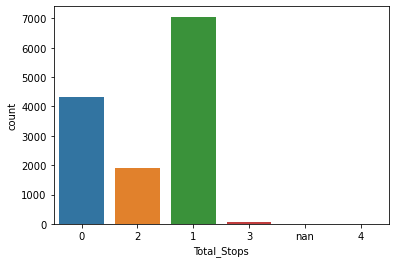

In [43]:
sns.countplot(df.Total_Stops)

In [44]:
df.Total_Stops.value_counts()

1      7056
0      4340
2      1899
3        56
4         2
nan       1
Name: Total_Stops, dtype: int64

<AxesSubplot:xlabel='Additional_Info', ylabel='count'>

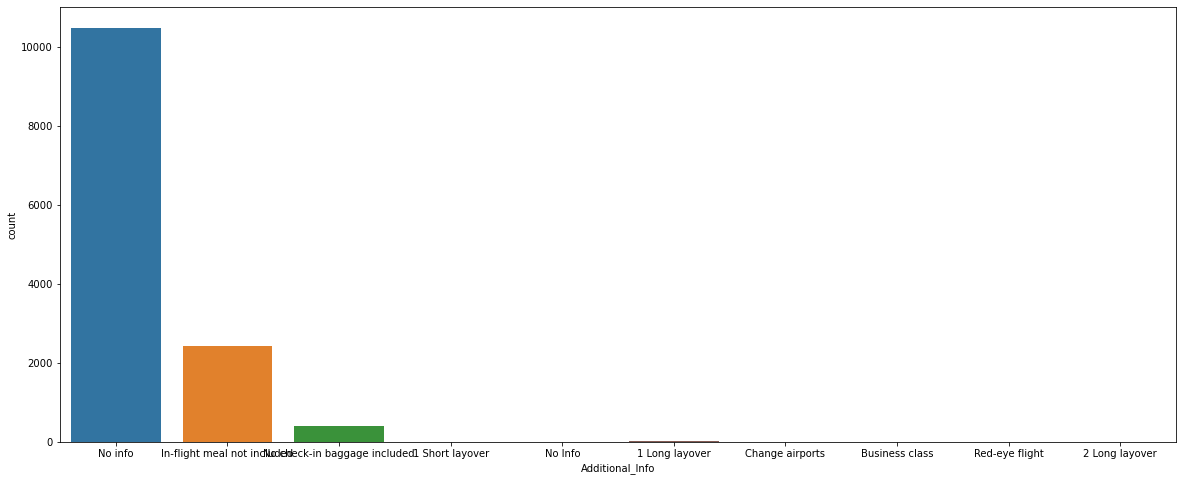

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(df.Additional_Info)

In [46]:
df.Additional_Info.value_counts()

No info                         10493
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
2 Long layover                      1
Red-eye flight                      1
1 Short layover                     1
Name: Additional_Info, dtype: int64

Around 78% rows of Additional_Info has no info, that means either the data is misssing or the travellers dont take additional services

<AxesSubplot:xlabel='Journey_Month', ylabel='count'>

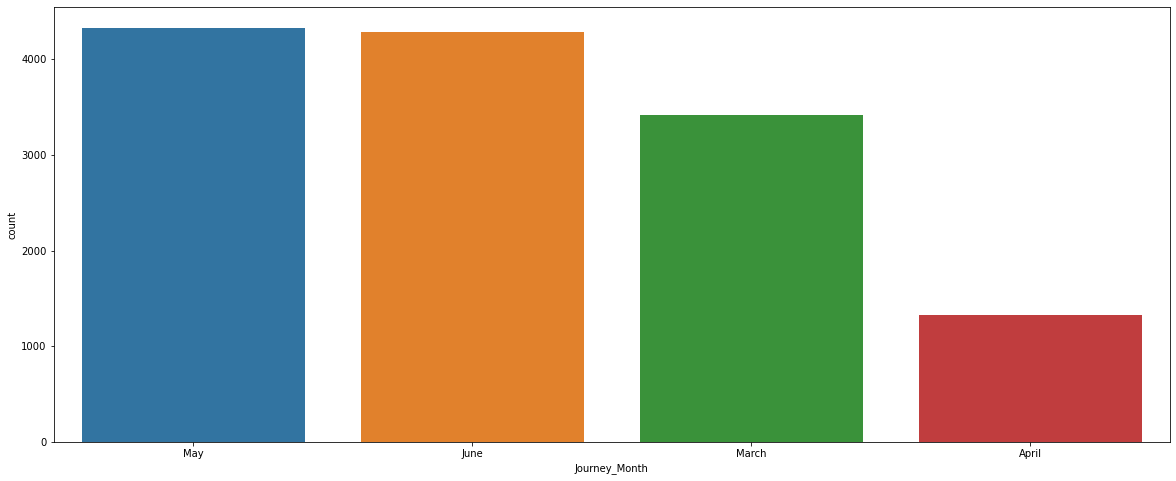

In [47]:
plt.figure(figsize=(20,8))
sns.countplot(df.Journey_Month,order=df.Journey_Month.value_counts().index)

<AxesSubplot:xlabel='weekday', ylabel='count'>

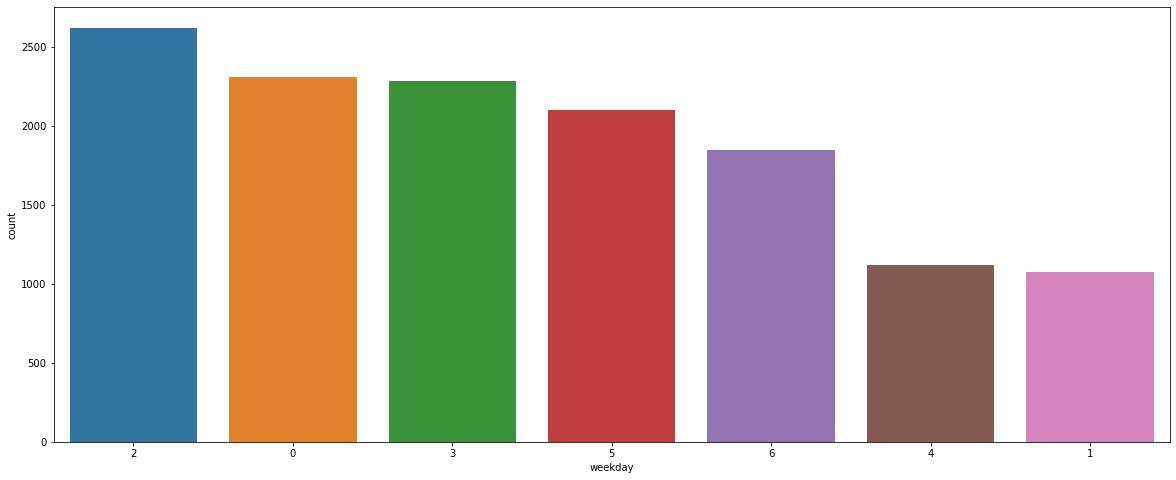

In [48]:
plt.figure(figsize=(20,8))
sns.countplot(df.weekday,order=df.weekday.value_counts().index)

# Multi-variate Analysis


In [49]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,No info,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,No info,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,No info,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,No info,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,No info,13302.0,1,March,4


In [50]:
# let's drop the additional info columns as  more than 75 perecent of its values are missing.

In [51]:
df.drop('Additional_Info',1,inplace=True)

In [52]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,13302.0,1,March,4


Jet Airways
IndiGo
Air India
Multiple carriers
SpiceJet
Vistara
Air Asia
GoAir
Multiple carriers Premium economy
Jet Airways Business
Vistara Premium economy
Trujet


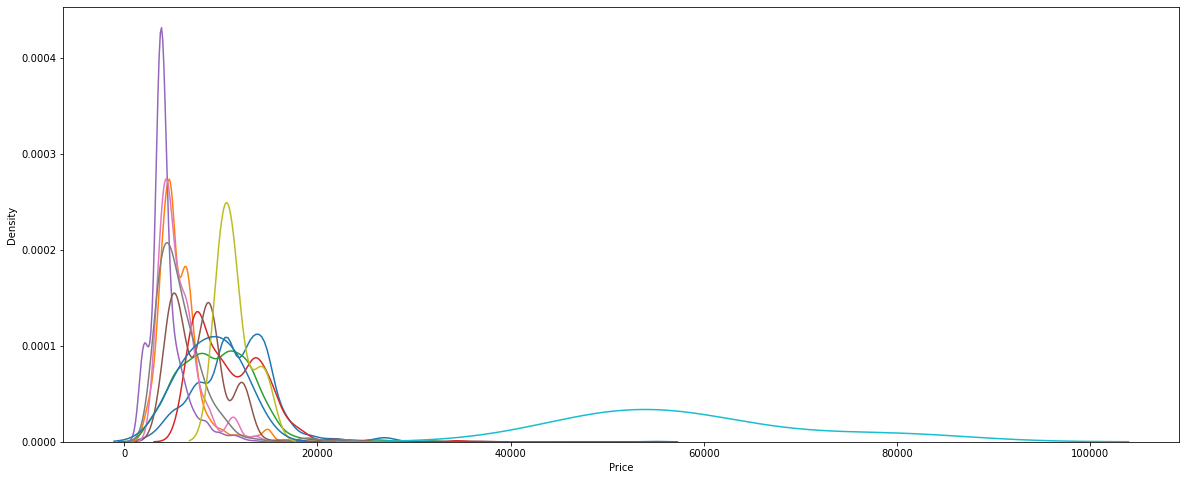

In [53]:
plt.figure(figsize=(20,8))
for Q in df.Airline.value_counts().index:
    print(Q)
    sns.kdeplot(df[df.Airline == Q]['Price'],label=Q)

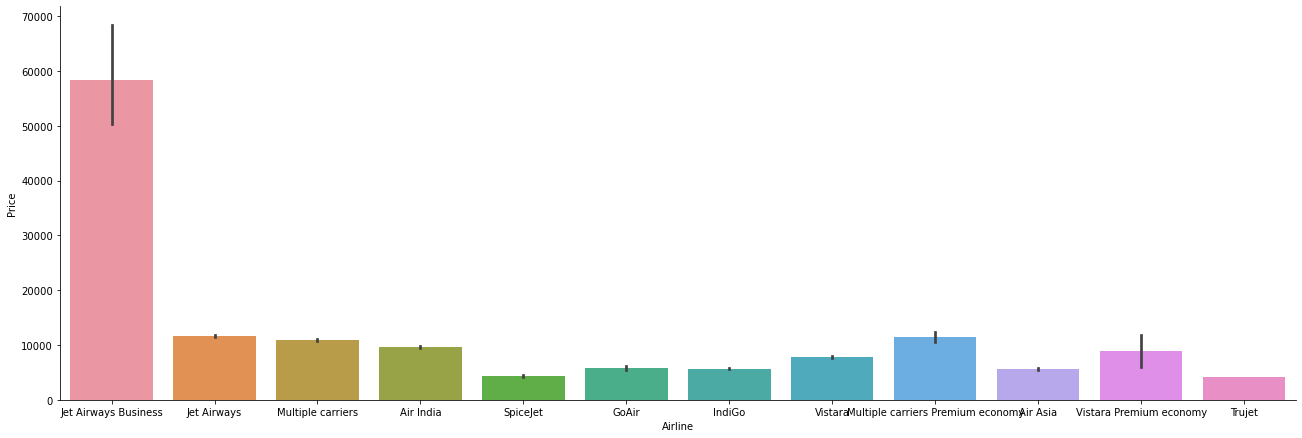

In [54]:
# AIRLINE vs PRICE
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

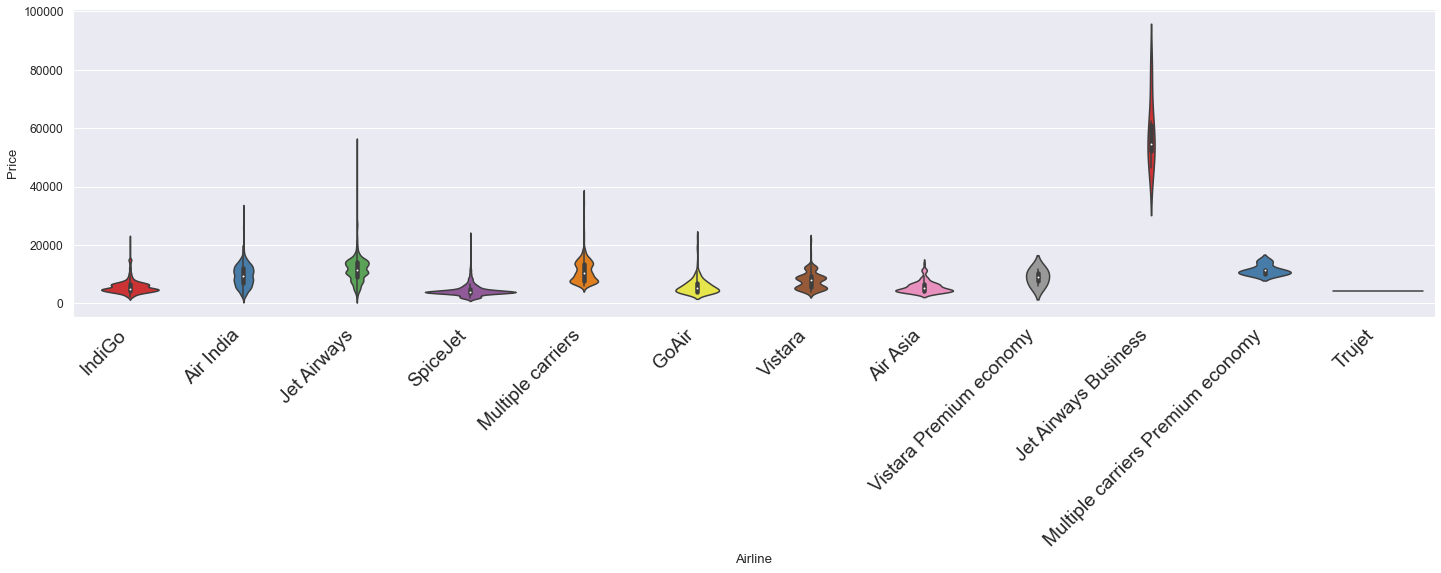

In [55]:
sns.set(font_scale=1.1)
sns.catplot(x='Airline',y='Price',kind='violin',data=df,height=5,aspect=4,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

Jet Airways Business Airline has the highest price apart from the first airline almost all are having similar median, 

maybe because of their services that they provide to their customers

From the above we can see that the second cheapest Indigo's ranges from 8 to 9, and spicejet has the cheapest flight fares.


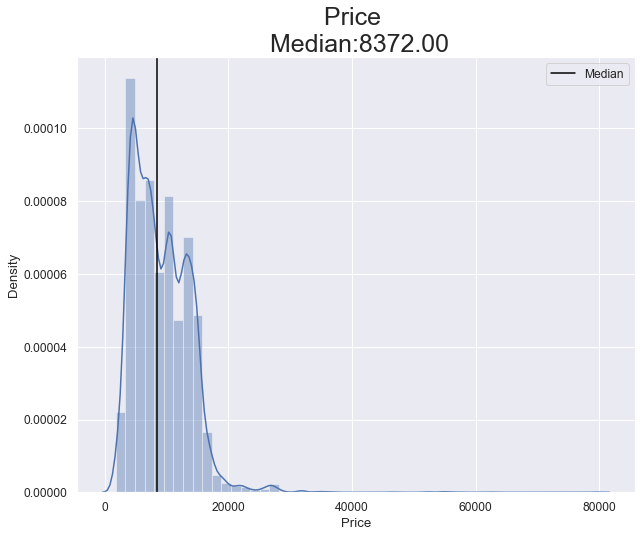

In [56]:
plt.figure(figsize=(10,8))
sns.distplot(df['Price'])
plt.title('Price \n Median:{0:.2f}'.format(df['Price'].median()),size=25)
plt.axvline(df['Price'].median(),color='black',label='Median')
plt.legend()

In [57]:
df.groupby(['Journey_Month']).mean()

,Duration,Price,Journey_Day,weekday
Journey_Month,,,,
April,380.868124,5770.847081,11.004521,2.202713
June,650.598927,8828.796134,12.178021,3.055063
March,689.081184,10673.205580,13.775791,3.514361
May,681.210672,9127.247548,15.016632,2.592285


We see that the average fare price is highest the month of March , this can be because people usually book the fights 2-3 months prior to their date of journey which leads to higher demand and hence higher fare prices.
(since the count of tickets booked for travelling in May is the most, prior bookings are done in March)

In [58]:
df.groupby(['weekday']).mean()

,Duration,Price,Journey_Day
weekday,,,
0,616.146077,8499.530811,13.653663
1,654.521375,9026.149597,17.436803
2,686.256009,9277.514190,12.080122
3,700.318441,8931.379367,14.586071
4,470.275647,9717.996700,14.067797
5,636.006676,8972.905389,12.087744
6,654.343970,9525.508820,12.150892


we can say that the highest prices are on Friday-4 while lowest being on Monday-0.


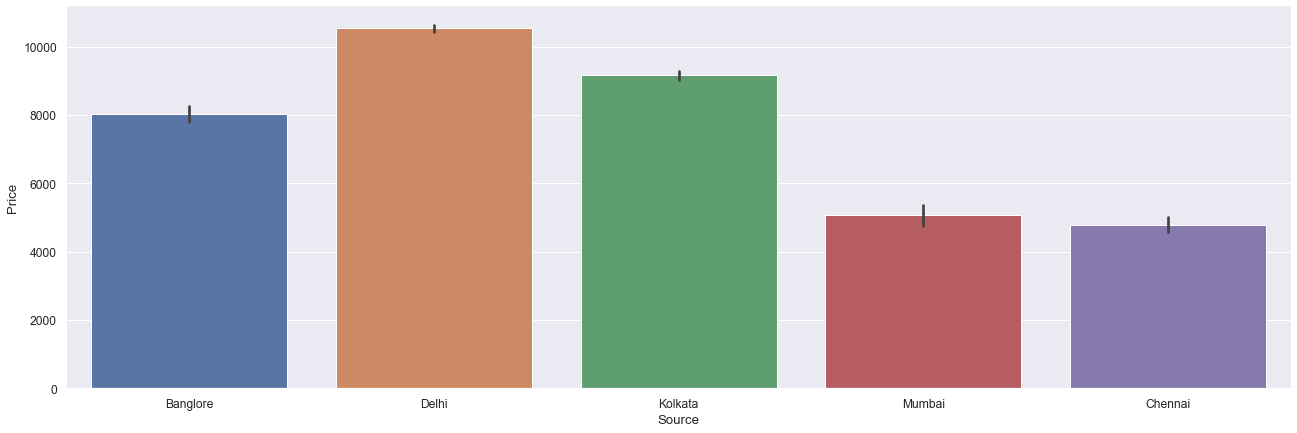

In [59]:
# Source vs PRICE
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

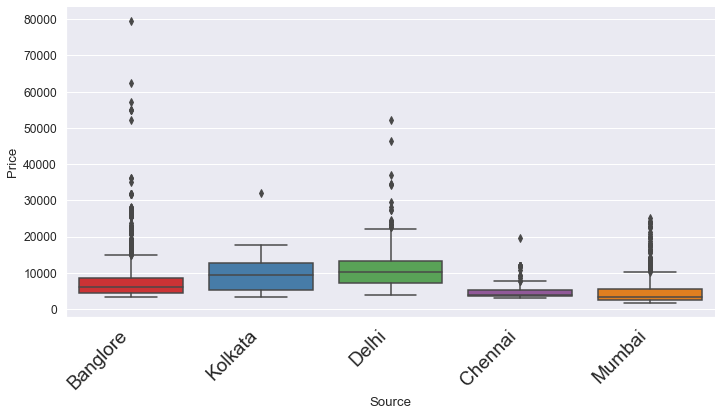

In [60]:
sns.set(font_scale=1.1)
sns.catplot(x='Source',y='Price',kind='box',data=df,aspect=2,palette='Set1')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

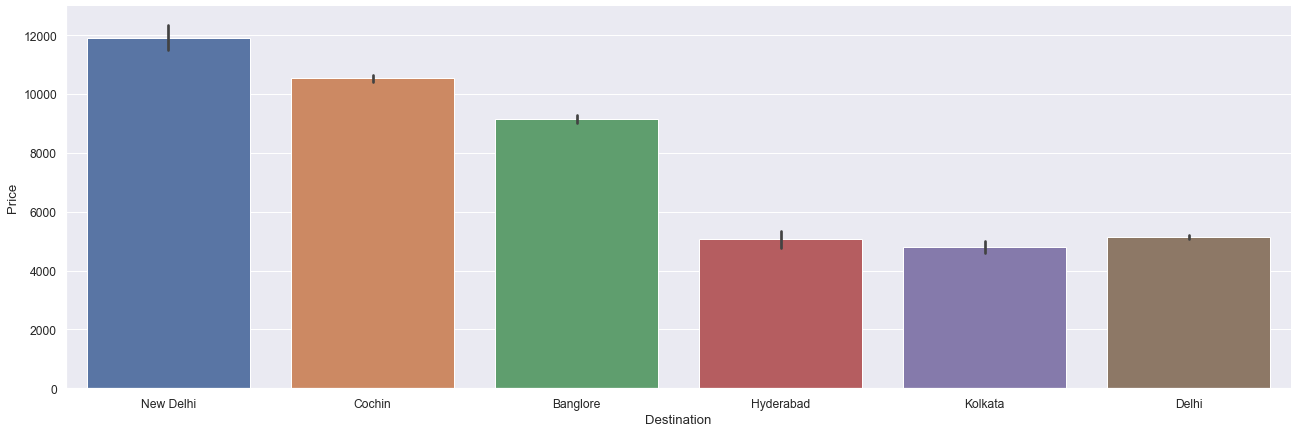

In [61]:
# Destination vs PRICE
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

From the above we can see that the price of most of the source are ranging from 8 to 9,

however their are some outliers as due to rush booking.

From the above we can see that most of the destinations average price are more than 8, at this point we can't do much EDA as most of the features are categorical features.

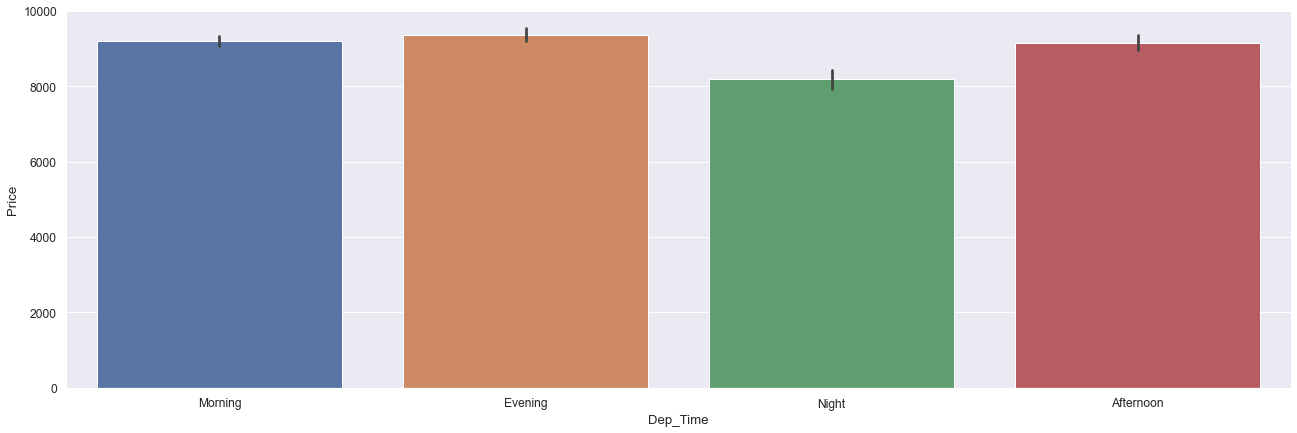

In [62]:
# Time vs PRICE
sns.catplot(y='Price',x='Dep_Time',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

Early Morning flights are always cheaper and so are night flight prices.

Evening flight fares are expensive due to more demand and is the most convenient time to tarvel for most people.

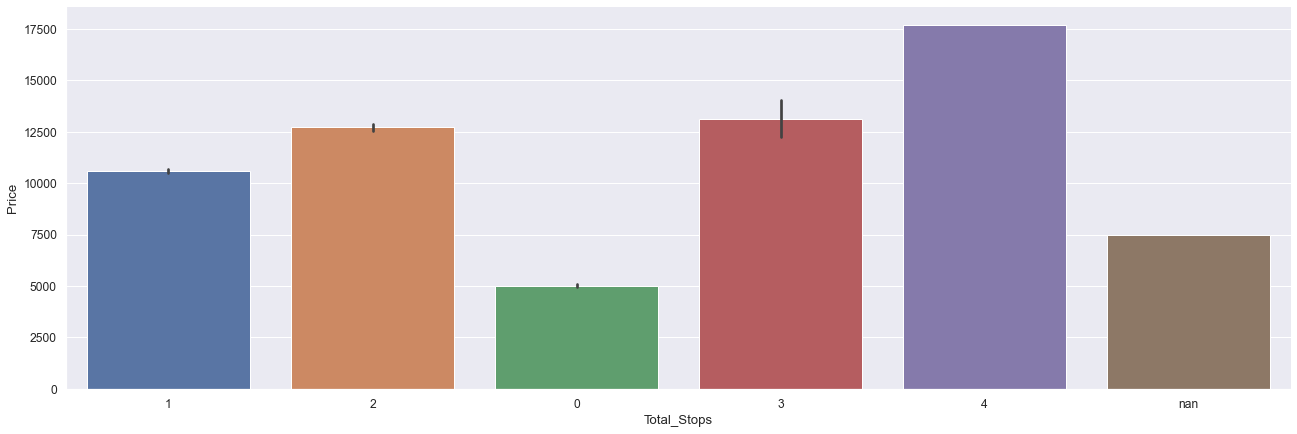

In [63]:
# Total_Stops Vs Price
sns.catplot(y='Price',x='Total_Stops',data= df.sort_values('Price',ascending=False),kind="bar",height=6, aspect=3)
plt.show()

As a non-stop flight is accounting for fare of only one flight for a trip, its average fair is the least. 

As the no. of stops/layovers increase, 

the fare price goes up accounting for no. of flights and due to other resources being used up for the same.

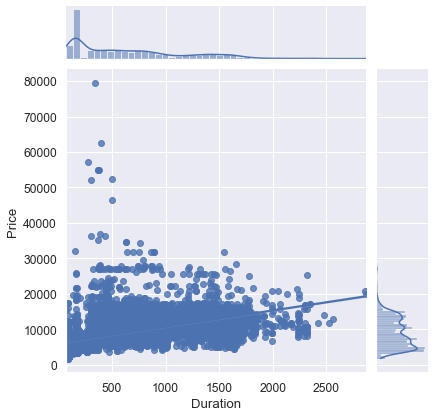

In [65]:
import scipy.stats as stats
dur = sns.jointplot(x='Duration',y='Price',data=df,kind = 'reg')
plt.show()

* We get p-value < 0.05, hence we say the target variable(Price) and continuous independent variable(Duration) are correlated. r = 0.51 says they are moderately related.

In [66]:
df.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price,Journey_Day,Journey_Month,weekday
0,IndiGo,Banglore,New Delhi,Night,170,0,3897.0,24,March,6
1,Air India,Kolkata,Banglore,Morning,445,2,7662.0,1,May,2
2,Jet Airways,Delhi,Cochin,Morning,1159,2,13882.0,9,June,6
3,IndiGo,Kolkata,Banglore,Evening,325,1,6218.0,12,May,6
4,IndiGo,Banglore,New Delhi,Evening,285,1,13302.0,1,March,4


In [67]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Dep_Time            0
Duration            0
Total_Stops         0
Price            2671
Journey_Day         0
Journey_Month       0
weekday             0
dtype: int64

In [68]:
df.columns[df.dtypes=="object"]

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Total_Stops',
       'Journey_Month'],
      dtype='object')

In [69]:
df=pd.get_dummies(df,columns=df.columns[df.dtypes=="object"],drop_first=True)

In [70]:
df.head()

,Duration,Price,Journey_Day,weekday,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Dep_Time_Morning,Dep_Time_Night,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Total_Stops_nan,Journey_Month_June,Journey_Month_March,Journey_Month_May
0,170,3897.0,24,6,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,445,7662.0,1,2,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1159,13882.0,9,6,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,325,6218.0,12,6,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,285,13302.0,1,4,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


# respliting the train ans test again afer the data processing is done.

In [71]:
df_train = df[~df.Price.isna()]

In [72]:
df_test = df[df.Price.isna()]

In [73]:
df_train.shape

(10683, 35)

In [74]:
df_test.shape

(2671, 35)

In [75]:
df_train

,Duration,Price,Journey_Day,weekday,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Dep_Time_Morning,Dep_Time_Night,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Total_Stops_nan,Journey_Month_June,Journey_Month_March,Journey_Month_May
0,170,3897.0,24,6,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,445,7662.0,1,2,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1159,13882.0,9,6,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,325,6218.0,12,6,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,285,13302.0,1,4,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,4107.0,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,155,4145.0,27,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10680,183,7229.0,27,5,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10681,160,12648.0,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [76]:
df_test

,Duration,Price,Journey_Day,weekday,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Dep_Time_Morning,Dep_Time_Night,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Total_Stops_nan,Journey_Month_June,Journey_Month_March,Journey_Month_May
0,655,NaN,6,3,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,244,NaN,12,6,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,1425,NaN,21,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,793,NaN,21,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,170,NaN,24,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1435,NaN,6,3,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2667,155,NaN,27,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2668,395,NaN,6,2,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0
2669,915,NaN,6,2,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0


In [77]:
df_train

,Duration,Price,Journey_Day,weekday,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Dep_Time_Morning,Dep_Time_Night,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Total_Stops_nan,Journey_Month_June,Journey_Month_March,Journey_Month_May
0,170,3897.0,24,6,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,445,7662.0,1,2,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
2,1159,13882.0,9,6,0,0,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,325,6218.0,12,6,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,285,13302.0,1,4,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,150,4107.0,9,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,155,4145.0,27,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10680,183,7229.0,27,5,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
10681,160,12648.0,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


__X and Y spit__

In [78]:
X = df_train.drop('Price',1)
y = df_train['Price']

## Train and Validation split

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [81]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((7478, 34), (7478,), (3205, 34), (3205,))

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building the model

In [83]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [84]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [85]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))  

In [86]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 7339672.5453205295
R2_Score 0.636621597413414


In [87]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
DTR=DecisionTreeRegressor(random_state=97)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)

In [88]:
models=[]
models.append(("LinearRegression",LR))
models.append(("Lasso",LA))
models.append(("Ridge",RI))
models.append(("DecisionTreeRegressor",DTR))
models.append(("AdaBoostRegressor",ABR))
models.append(("RandomForestRegressor",RFR))
models.append(("GradientBoostingRegressor",GBR))

In [89]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
MAE=[]
RMSE=[]
for name,model in models:
    print('-------------------------------------',name,'-------------------------------')
    print(model)
    Model.append(name)
    model.fit(X_train,y_train)
    pr=model.predict(X_test)
    r2=r2_score(y_test,pr)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pr)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    mae=mean_absolute_error(y_test,pr)
    print("Mean_Absolute_Error =",mae)
    MAE.append(mae)
    rmse=np.sqrt(mse)
    print("Root_Mean_Squared_Error =",rmse)
    RMSE.append(rmse)
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

------------------------------------- LinearRegression -------------------------------
LinearRegression()
R2_score =  0.636621597413414
Mean_Squared_Error = 7339672.5453205295
Mean_Absolute_Error = 1933.220178277905
Root_Mean_Squared_Error = 2709.1830032909425
Cross_Val_Score =  0.6358887424180696


------------------------------------- Lasso -------------------------------
Lasso()
R2_score =  0.6368482793733615
Mean_Squared_Error = 7335093.926046232
Mean_Absolute_Error = 1936.6299174064459
Root_Mean_Squared_Error = 2708.337853009892
Cross_Val_Score =  0.6357273472754568


------------------------------------- Ridge -------------------------------
Ridge()
R2_score =  0.6367501682819086
Mean_Squared_Error = 7337075.615874804
Mean_Absolute_Error = 1937.9577838638195
Root_Mean_Squared_Error = 2708.703678122582
Cross_Val_Score =  0.6349029716087962


------------------------------------- DecisionTreeRegressor -------------------------------
DecisionTreeRegressor(random_state=97)
R2_score =

In [90]:

result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Mean_Absolute_Error' :MAE,'Root_Mean_Squared_Error' :RMSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Mean_Absolute_Error,Root_Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.636622,7.339673e+06,1933.220178,2709.183003,0.635889
1,Lasso,0.636848,7.335094e+06,1936.629917,2708.337853,0.635727
2,Ridge,0.636750,7.337076e+06,1937.957784,2708.703678,0.634903
3,DecisionTreeRegressor,0.716101,5.734306e+06,1446.745310,2394.641147,0.685365
4,AdaBoostRegressor,0.505499,9.988133e+06,2419.243683,3160.400772,0.516864
5,RandomForestRegressor,0.777506,4.494025e+06,1300.805270,2119.911483,0.785232
6,GradientBoostingRegressor,0.769428,4.657187e+06,1512.638375,2158.051766,0.764722


In [91]:
from sklearn.model_selection import RandomizedSearchCV


In [92]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1300,num=13)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_spli=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [93]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_spli,
               'min_samples_leaf': min_samples_leaf}

In [94]:
rf_rand = RandomizedSearchCV(estimator=RFR,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5
                            ,verbose=2,random_state=42,n_jobs=1)

In [95]:
rf_rand.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   2.8s
[CV] n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=800, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=15, total=  16.3s
[CV] n_estimators=800, min_samples_split=100, 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 12.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=97),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100, 1200,
                                                         1300]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [96]:
rf_rand.best_params_


{'n_estimators': 1300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [97]:
prediction = rf_rand.predict(X_test)


In [98]:
from sklearn import metrics


metrics.r2_score(y_test,prediction)


0.7881483867125377

In [99]:
print(cross_val_score(RFR,X,y,cv=10).mean())


0.7852324549798937


In [100]:

print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1264.767735236253
MSE: 4279069.583276461
RMSE: 2068.591207386433


In [101]:
best_model = RandomForestRegressor()

In [102]:
best_model.fit(X_train,y_train)

RandomForestRegressor()

In [103]:
best_model.score(X_test,y_test)

0.7799631327885684

## Predicting on the test set

In [104]:
df_test.head()

,Duration,Price,Journey_Day,weekday,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,...,Dep_Time_Morning,Dep_Time_Night,Total_Stops_1,Total_Stops_2,Total_Stops_3,Total_Stops_4,Total_Stops_nan,Journey_Month_June,Journey_Month_March,Journey_Month_May
0,655,NaN,6,3,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,244,NaN,12,6,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
2,1425,NaN,21,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,793,NaN,21,1,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
4,170,NaN,24,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [105]:
df_test.drop('Price',1,inplace=True)

In [106]:
test_prediction = best_model.predict(df_test)

## Saving to csv and saving model

In [107]:
pd.DataFrame(test_prediction,columns=['Price']).to_csv('Test_results')

In [108]:
import joblib
joblib.dump(best_model,'flight_price.pkl')

['flight_price.pkl']

__Summary__

in above model it is summaried the correlation of flight prices with other features do co related with the prices 

also best model has been predicted which is random forest regressor